### Tema: Concentração de Pesticidas em Agroprodutos nos EUA
### Universidade: UFRRJ - Universidade Federal Rural do Rio de Janeiro
### Disciplina: Tópicos em Banco de Dados
### Professor: Sérgio Serra
### Autor do código: Nícolas Terra Maia

# Import libraries

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import geopandas as gpd

# Read auxiliar CSVs

In [2]:
anotate_codes = pd.read_csv('./datasets/anotate_codes.csv')
claim_codes = pd.read_csv('./datasets/claim_codes.csv')
commod_type_codes = pd.read_csv('./datasets/commod_type_codes.csv')
commodity_codes = pd.read_csv('./datasets/commodity_codes.csv')
concen_codes = pd.read_csv('./datasets/concen_codes.csv')
confmethod_codes = pd.read_csv('./datasets/confmethod_codes.csv')
country_codes = pd.read_csv('./datasets/country_codes.csv')
determin_codes = pd.read_csv('./datasets/determin_codes.csv')
diisttype_codes = pd.read_csv('./datasets/disttype_codes.csv')
extract_codes = pd.read_csv('./datasets/extract_codes.csv')
lab_codes = pd.read_csv('./datasets/lab_codes.csv')
mean_codes = pd.read_csv('./datasets/mean_codes.csv')
origin_codes = pd.read_csv('./datasets/origin_codes.csv')
pest_codes = pd.read_csv('./datasets/pest_codes.csv')
quantitate_codes = pd.read_csv('./datasets/quantitate_codes.csv')
state_codes = pd.read_csv('./datasets/state_codes.csv')
test_class_codes = pd.read_csv('./datasets/test_class_codes.csv')
tolerance_codes = pd.read_csv('./datasets/tolerance_codes.csv')
us_states = pd.read_csv('./datasets/us_states.csv')

# Read samples from all years

In [3]:
samples_colums_labels = ('sample_pk','state', 'year', 'month', 'day', 'site', 'commod', 'source_id', 'variety', 'origin', 'country', 'disttype', 'commtype', 'claim', 'quantity', 'growst', 'packst', 'diistst');

samples_15 = pd.read_csv('./datasets/database/2015PDPDatabase/PDP15Samples.txt', delimiter="|", names=samples_colums_labels);
samples_16 = pd.read_csv('./datasets/database/2016PDPDatabase/PDP16Samples.txt', delimiter="|", names=samples_colums_labels);
samples_17 = pd.read_csv('./datasets/database/2017PDPDatabase/PDP17Samples.txt', delimiter="|", names=samples_colums_labels);
samples_18 = pd.read_csv('./datasets/database/2018PDPDatabase/PDP18Samples.txt', delimiter="|", names=samples_colums_labels);
samples_19 = pd.read_csv('./datasets/database/2019PDPDatabase/PDP19Samples.txt', delimiter="|", names=samples_colums_labels);

# Remove imported products
samples_15 = samples_15[samples_15['origin']==1]
samples_16 = samples_16[samples_16['origin']==1]
samples_17 = samples_17[samples_17['origin']==1]
samples_18 = samples_18[samples_18['origin']==1]
samples_19 = samples_19[samples_19['origin']==1]

# Remove unnecessary columns
samples_15.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_16.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_17.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_18.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_19.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 

# Read results of all years

In [4]:
results_colums_labels = ('sample_pk','commod', 'commtype', 'lab', 'pestcode', 'testclass', 'concen', 'lod', 'conunit', 'confmethod', 'confmethod2', 'annotate', 'quantitate', 'mean', 'extract', 'determin');
results_15 = pd.read_csv('./datasets/database/2015PDPDatabase/PDP15Results.txt', delimiter="|", names=results_colums_labels);
results_16 = pd.read_csv('./datasets/database/2016PDPDatabase/PDP16Results.txt', delimiter="|", names=results_colums_labels);
results_17 = pd.read_csv('./datasets/database/2017PDPDatabase/PDP17Results.txt', delimiter="|", names=results_colums_labels);
results_18 = pd.read_csv('./datasets/database/2018PDPDatabase/PDP18Results.txt', delimiter="|", names=results_colums_labels);
results_19 = pd.read_csv('./datasets/database/2019PDPDatabase/PDP19Results.txt', delimiter="|", names=results_colums_labels);

/home/nicolas/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/nicolas/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Join results and samples CSVs

In [5]:
results_join_samples_15 = results_15.merge(samples_15,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_16 = results_16.merge(samples_16,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_17 = results_17.merge(samples_17,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_18 = results_18.merge(samples_18,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_19 = results_19.merge(samples_19,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})

In [6]:
results_join_samples_15 = results_join_samples_15[~results_join_samples_15['concen'].isna()]
results_join_samples_16 = results_join_samples_16[~results_join_samples_16['concen'].isna()]
results_join_samples_17 = results_join_samples_17[~results_join_samples_17['concen'].isna()]
results_join_samples_18 = results_join_samples_18[~results_join_samples_18['concen'].isna()]
results_join_samples_19 = results_join_samples_19[~results_join_samples_19['concen'].isna()]

In [7]:
results_join_samples_17

,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,...,year,month,day,site,source_id,variety,origin,disttype,claim,quantity
18,1,AC,PU,WA1,125,F,0.0160,0.0020,M,GT,...,17,1,9,142,P,Regular,1,R,NC,1.0
28,1,AC,PU,WA1,157,B,0.1100,0.0020,M,LU,...,17,1,9,142,P,Regular,1,R,NC,1.0
196,1,AC,PU,WA1,B75,A,0.0050,0.0030,M,LU,...,17,1,9,142,P,Regular,1,R,NC,1.0
220,3,AC,PU,WA1,125,F,0.0120,0.0020,M,GT,...,17,1,9,414,P,Regular,1,R,NC,1.0
230,3,AC,PU,WA1,157,B,0.0800,0.0020,M,LU,...,17,1,9,414,P,Regular,1,R,NC,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856260,10384,ZB,CA,NY1,058,F,0.0025,0.0015,M,GT,...,17,12,11,406,P,Garbanzo,1,R,PO,2.0
1861839,10414,ZB,CA,NY1,070,I,0.0025,0.0015,M,GT,...,17,12,4,38,P,Garbanzo,1,R,NC,2.0
1872792,10470,ZB,CA,NY1,070,I,0.0025,0.0015,M,GT,...,17,11,14,11,P,Garbanzo,1,R,NC,1.0
1877524,10492,ZB,CA,NY1,125,F,0.0210,0.0030,M,GT,...,17,10,2,306,P,Garbanzo,1,R,NC,2.0


# Evaluate each pesticide's presence in all years

In [8]:
def get_pest_concen_mean (df):
  index_name = 'concen_' + str(df.loc[:, 'year'].iloc[0])
  pest_concen_not_null = df[~df['concen'].isna()]
  
  pest_concen_mean = pest_concen_not_null[['pestcode', 'concen']].groupby(['pestcode'])['concen'].mean().rename_axis(['pestcode']).reset_index(name=index_name)
  
  return pest_concen_mean


In [9]:
pest_concen_mean_15 = get_pest_concen_mean(results_join_samples_15)
pest_concen_mean_16 = get_pest_concen_mean(results_join_samples_16)
pest_concen_mean_17 = get_pest_concen_mean(results_join_samples_17)
pest_concen_mean_18 = get_pest_concen_mean(results_join_samples_18)
pest_concen_mean_19 = get_pest_concen_mean(results_join_samples_19)

In [32]:
pest_concen_mean_all_years = pest_concen_mean_15.merge(pest_concen_mean_16, on='pestcode', how='outer').merge(pest_concen_mean_17, on='pestcode', how='outer').merge(pest_concen_mean_18, on='pestcode', how='outer').merge(pest_concen_mean_19, on='pestcode', how='outer')

In [35]:
pest_concen_mean_19[pest_concen_mean_19['pestcode']=='PP']

,pestcode,concen_19


In [34]:
pest_concen_mean_all_years

,pestcode,concen_15,concen_16,concen_17,concen_18,concen_19
0,011,0.359540,0.360200,NaN,NaN,0.247990
1,024,0.020322,0.015900,0.071767,0.029742,0.003900
2,028,0.013624,0.014340,0.005504,0.004378,0.009877
3,042,0.004000,NaN,NaN,NaN,NaN
4,052,0.025630,0.018003,0.150900,0.009454,0.018714
...,...,...,...,...,...,...
235,ANF,NaN,NaN,NaN,NaN,0.001750
236,ANG,NaN,NaN,NaN,NaN,0.005800
237,C90,NaN,NaN,NaN,NaN,0.077000
238,F40,NaN,NaN,NaN,NaN,0.023950


In [37]:
only_values = pest_concen_mean_all_years.loc[:,'concen_15':]
only_values_T = only_values.T
only_values_T.columns=pest_concen_mean_all_years['pestcode']

In [38]:
only_values_T

pestcode,011,024,028,042,052,070,075,083,102,104,...,AHF,AJO,AJQ,AJR,ANC,ANF,ANG,C90,F40,F53
concen_15,0.35954,0.020322,0.013624,0.004,0.025630,0.161080,0.27,0.766846,0.144371,0.04975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concen_16,0.36020,0.015900,0.014340,NaN,0.018003,0.400529,0.29,0.902179,0.095971,0.03330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concen_17,NaN,0.071767,0.005504,NaN,0.150900,0.089262,NaN,0.006400,0.040293,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concen_18,NaN,0.029742,0.004378,NaN,0.009454,0.084025,NaN,NaN,0.190652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concen_19,0.24799,0.003900,0.009877,NaN,0.018714,0.032647,NaN,0.008967,0.101433,NaN,...,0.18,0.0333,0.025,0.0939,0.716003,0.00175,0.0058,0.077,0.02395,0.01


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

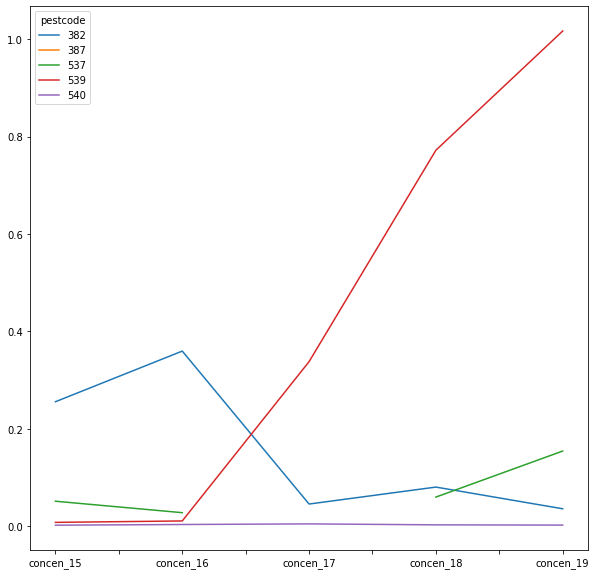

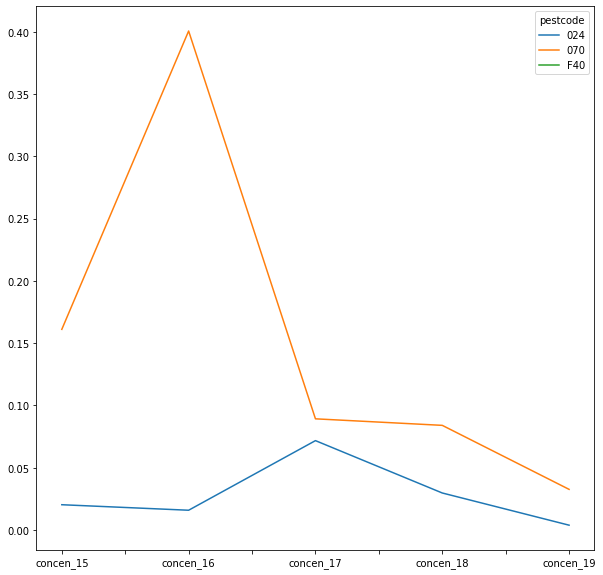

In [39]:
plt.figure()

# Select only a subset because there are too many pesticides
only_values_T.iloc[:,50:55].plot(figsize=(10,10))
only_values_T.loc[:,['024', '070', 'F40']].plot(figsize=(10,10))

# Get only states and commodities with concentration values in all years

In [15]:
def get_state_commod_concen_mean (df):
  pest_concen_not_null = df[~df['concen'].isna()]
  
  concen_state_commod_mean = pest_concen_not_null[['year','pestcode', 'state', 'commod', 'concen', 'lod']].groupby(['year', 'state', 'commod', 'pestcode', 'lod'])['concen'].mean().rename_axis(['year', 'state', 'commod', 'pestcode', 'lod']).reset_index(name='concen').sort_values('state')
  
  return concen_state_commod_mean.merge(us_states, on='state', how='inner')

def select_pest_commod (df, c, p):
    return df[(df['pestcode']==p) & (df['commod']==c)]
    
def colorize_concen (row):
  if row['concen']>row['lod']:
    return '#C62828'
  if row['concen']<=row['lod']:
    return '#283593'

def get_commod_state_concen_colors(df, c, p):
  df_result = select_pest_commod(df, c, p)
  colors_column = df_result.apply(lambda row: colorize_concen(row), axis=1)
  try:
    df_result['mapcolor'] = colors_column
  except:
    print('Um dos valores informados não existe na tabela do ano ' + str(df.loc[0]['year']))
  return df_result


In [16]:
concen_state_commod_mean_15 = get_state_commod_concen_mean(results_join_samples_15)
concen_state_commod_mean_16 = get_state_commod_concen_mean(results_join_samples_16)
concen_state_commod_mean_17 = get_state_commod_concen_mean(results_join_samples_17)
concen_state_commod_mean_18 = get_state_commod_concen_mean(results_join_samples_18)
concen_state_commod_mean_19 = get_state_commod_concen_mean(results_join_samples_19)

In [17]:
concen_state_commod_mean_17[(concen_state_commod_mean_17['concen']
<=concen_state_commod_mean_17['lod'])]

,year,state,commod,pestcode,lod,concen,latitude,longitude,name
57,17,CA,SW,160,0.010,0.010,36.778261,-119.417932,California
58,17,CA,SW,612,0.120,0.120,36.778261,-119.417932,California
110,17,CA,CG,ADG,0.010,0.010,36.778261,-119.417932,California
146,17,CA,AC,B52,0.001,0.001,36.778261,-119.417932,California
232,17,CO,LT,134,0.002,0.002,39.550051,-105.782067,Colorado
235,17,CO,LT,AFO,0.003,0.003,39.550051,-105.782067,Colorado
274,17,CO,CG,159,0.010,0.010,39.550051,-105.782067,Colorado
279,17,CO,AC,B68,0.001,0.001,39.550051,-105.782067,Colorado
322,17,FL,LT,AHM,0.002,0.002,27.664827,-81.515754,Florida
337,17,FL,LT,151,0.001,0.001,27.664827,-81.515754,Florida


In [44]:
commod_state_concen_colors_15 = get_commod_state_concen_colors(concen_state_commod_mean_15, 'AP', 'AKD')
commod_state_concen_colors_16 = get_commod_state_concen_colors(concen_state_commod_mean_16, 'SP', '781')
commod_state_concen_colors_17 = get_commod_state_concen_colors(concen_state_commod_mean_17, 'LT', '134')
commod_state_concen_colors_18 = get_commod_state_concen_colors(concen_state_commod_mean_18, 'AP', 'AKD')
commod_state_concen_colors_19 = get_commod_state_concen_colors(concen_state_commod_mean_19, 'AS', 'AKD')

Um dos valores informados não existe na tabela do ano 15
Um dos valores informados não existe na tabela do ano 18
Um dos valores informados não existe na tabela do ano 19


/tmp/ipykernel_23786/3703314335.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['mapcolor'] = colors_column


## Plot pesticide concentration per commodity per state

In [46]:
gpd.GeoDataFrame(commod_state_concen_colors_17, geometry=gpd.points_from_xy(commod_state_concen_colors_17.longitude, commod_state_concen_colors_17.latitude))
states = gpd.read_file('shapes/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")

In [47]:
states_colors = commod_state_concen_colors_17[['state', 'mapcolor']]
a = states.rename(columns={'STUSPS': 'state'}).merge(states_colors, on='state', how='left')
b = a.fillna('#fffacf')

/tmp/ipykernel_23786/578689533.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5),axis=1);


<AxesSubplot:>

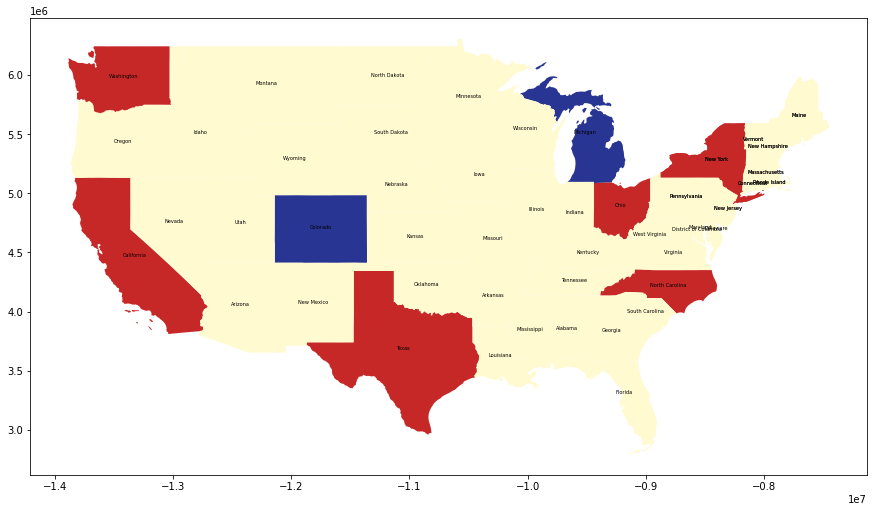

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5),axis=1);
states.plot(ax=ax, figsize=(12,12), color=b['mapcolor'])

# Eval each pesticide's presence per commodity in all years

In [49]:
def get_commod_concen_mean (df):
  index_name = 'concen_' + str(df.loc[:, 'year'].iloc[0])
  pest_concen_not_null = df[~df['concen'].isna()]
  
  pest_concen_commod_mean = pest_concen_not_null[['pestcode', 'commod', 'concen']].groupby(['commod', 'pestcode'])['concen'].mean().reset_index(name=index_name)
  
  return pest_concen_commod_mean


In [50]:
concen_commod_mean_15 = get_commod_concen_mean(results_join_samples_15)
concen_commod_mean_16 = get_commod_concen_mean(results_join_samples_16)
concen_commod_mean_17 = get_commod_concen_mean(results_join_samples_17)
concen_commod_mean_18 = get_commod_concen_mean(results_join_samples_18)
concen_commod_mean_19 = get_commod_concen_mean(results_join_samples_19)

In [73]:
concen_commod_mean_15

,commod,pestcode,concen_15
0,AP,024,0.021038
1,AP,083,0.018333
2,AP,102,0.355556
3,AP,104,0.040500
4,AP,125,0.336268
...,...,...,...
712,WM,AGW,0.016000
713,WM,AHT,0.014000
714,WM,B22,0.016941
715,WM,B43,0.007900


In [84]:
aux1 = concen_commod_mean_15[concen_commod_mean_15['commod']=='AP']
aux2 = aux1.drop(columns=['pestcode', 'commod'])
aux3 = aux2.T
aux3.columns= aux1['pestcode']
aux3

pestcode,024,083,102,104,125,157,160,165,382,597,...,B43,B52,B56,B58,B61,B68,B75,B79,B80,B85
concen_15,0.021038,0.018333,0.355556,0.0405,0.336268,0.439591,0.005,0.083878,0.255714,0.01675,...,0.008286,0.0068,0.033333,0.0138,0.0259,0.00688,0.03885,0.005553,0.033925,0.035822


<AxesSubplot:>

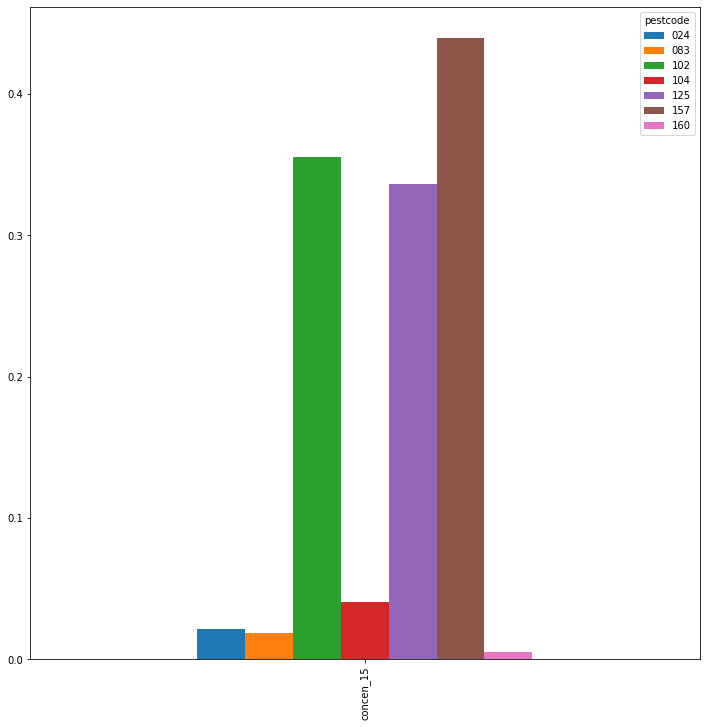

In [86]:
aux3.loc[:,'024':'160'].plot(kind='bar', figsize=(12,12))